In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [33]:
df = pd.read_csv("../data/raw/merged_table_alexandra.csv")

In [34]:
df


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,seller_id,price,...,payment_id,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,1,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,...,2,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,...,3,1,credit_card,4,249.25,costruction_tools_garden,2200.0,16.0,16.0,16.0
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,639iGvMyv0De,jWzS0ayv9TGf,264.50,...,4,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,1lycYGcsic2F,l1pYW6GBnPMr,779.90,...,5,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,W8vikEizUggJ,2QjevWskirjm,31.99,...,89312,1,wallet,1,128.00,toys,700.0,21.0,14.0,14.0
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,...,89313,1,wallet,1,106.86,toys,600.0,16.0,16.0,16.0
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,EG4wDSpFyTth,TuPm19CMKvrM,58.10,...,89314,1,credit_card,1,376.39,health_beauty,250.0,22.0,10.0,18.0
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,...,89315,1,voucher,1,48.05,toys,250.0,16.0,2.0,11.0


In [35]:
df.iloc[0]

order_id                                Axfy13Hk4PIk
customer_id                             hCT0x9JiGXBQ
order_status                               delivered
order_purchase_timestamp         2017-10-22 18:57:54
order_approved_at                2017-10-22 19:14:13
order_delivered_timestamp        2017-10-26 22:19:52
order_estimated_delivery_date             2017-11-09
product_id                              90K0C1fIyQUf
seller_id                               ZWM05J9LcBSF
price                                         223.51
shipping_charges                               84.65
customer_zip_code_prefix                       58125
customer_city                        varzea paulista
customer_state                                    SP
payment_id                                         1
payment_sequential                                 1
payment_type                             credit_card
payment_installments                               1
payment_value                                 

In [36]:
df.groupby("order_id")["price"].sum()

order_id
001gkk6BwKEB      12.69
0029bAIZFMKA     692.00
002Jk8hp9Bhy      41.79
002ohHsWSKrP     459.00
0041NijdAYB0     518.18
                 ...   
zznTUG01XP33      49.38
zzp0E0UK1yAl      56.89
zzq1nZ4dGR6g     914.00
zzqZvKoIAsrw    2130.00
zzxE4qACYBT2      77.07
Name: price, Length: 89316, dtype: float64

In [37]:
# For each customer we calculate the average profit per purchase
df.groupby("customer_id")["price"].mean()

customer_id
000hN1Tzi4iN     30.05
001T2XiQONtX    100.00
005aQnkeGglh    107.63
0075TryJTCaQ    335.99
00D6vdR3ymjv    109.82
                 ...  
zzk6zq3hjWs7    626.00
zzlv85tNHfhU    849.50
zzo1CmIAS7Ag    100.00
zzxSI88Vwv7d     33.25
zzzEZ7FwuZqA    257.60
Name: price, Length: 89316, dtype: float64

In [38]:
df.groupby("customer_id")["order_id"].nunique()


customer_id
000hN1Tzi4iN    1
001T2XiQONtX    1
005aQnkeGglh    1
0075TryJTCaQ    1
00D6vdR3ymjv    1
               ..
zzk6zq3hjWs7    1
zzlv85tNHfhU    1
zzo1CmIAS7Ag    1
zzxSI88Vwv7d    1
zzzEZ7FwuZqA    1
Name: order_id, Length: 89316, dtype: int64

In [39]:
df["customer_id"].nunique()


89316

In [40]:
len(df)


89316

In [41]:
(df["customer_id"].value_counts() > 1).any()


np.False_

In [42]:
df.shape


(89316, 24)

In [43]:
df.nunique()

order_id                         89316
customer_id                      89316
order_status                         7
order_purchase_timestamp         72775
order_approved_at                68215
order_delivered_timestamp        71143
order_estimated_delivery_date      444
product_id                       27451
seller_id                         2929
price                             5235
shipping_charges                  6327
customer_zip_code_prefix         13930
customer_city                     3735
customer_state                      27
payment_id                       89316
payment_sequential                  28
payment_type                         4
payment_installments                24
payment_value                    25520
product_category_name               70
product_weight_g                  2020
product_length_cm                   99
product_height_cm                  101
product_width_cm                    93
dtype: int64

In [44]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   9
order_delivered_timestamp        1889
order_estimated_delivery_date       0
product_id                          0
seller_id                           0
price                               0
shipping_charges                    0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_id                          0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_category_name             308
product_weight_g                   15
product_length_cm                  15
product_height_cm                  15
product_width_cm                   15
dtype: int64

In [45]:
vc = df["product_category_name"].value_counts().head(50)
vc

product_category_name
toys                                       67027
health_beauty                               2351
bed_bath_table                              2146
sports_leisure                              1837
furniture_decor                             1760
computers_accessories                       1715
housewares                                  1340
watches_gifts                               1196
telephony                                    912
auto                                         829
garden_tools                                 807
cool_stuff                                   718
perfumery                                    671
baby                                         621
electronics                                  547
office_furniture                             533
stationery                                   462
fashion_bags_accessories                     408
pet_shop                                     394
home_appliances                              21

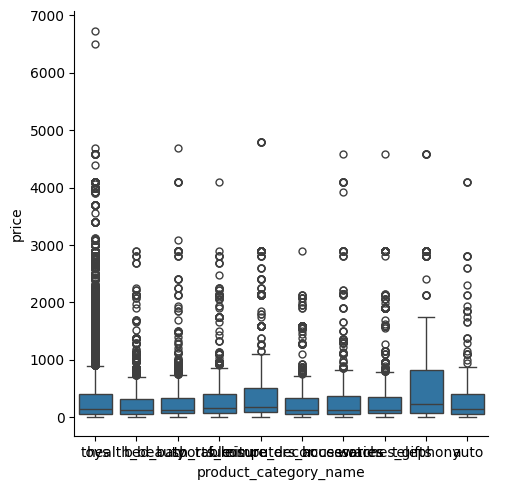

In [47]:
sns.catplot(data=df, x="product_category_name", y="price", kind="box", order=vc.index[:10])

<Axes: xlabel='product_weight_g', ylabel='price'>

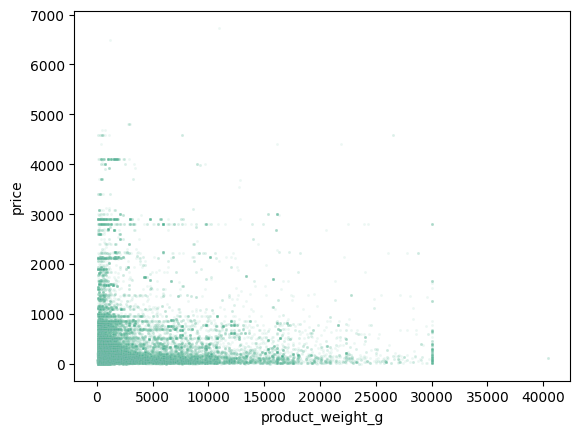

In [48]:
sns.scatterplot(data=df,x="product_weight_g",y="price", color="#4CB391",alpha=0.1, s=4)


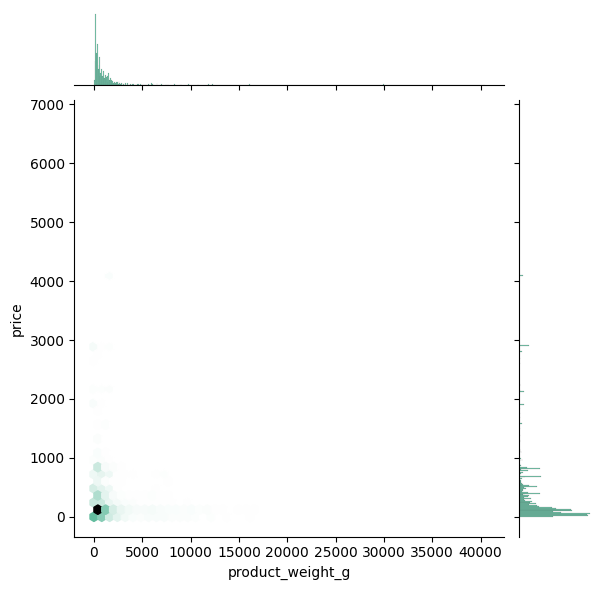

In [49]:
sns.jointplot(data=df,x="product_weight_g",y="price", kind="hex", color="#4CB391",)


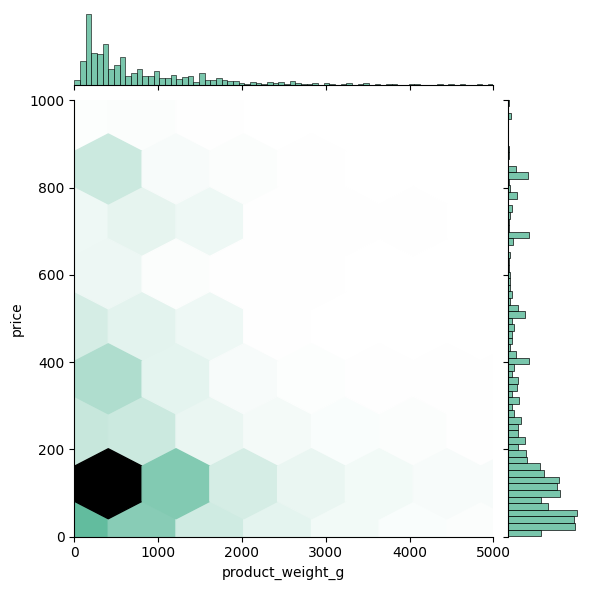

In [50]:

sns.jointplot(data=df,x="product_weight_g",y="price", kind="hex", color="#4CB391",
             xlim=(0,5000),ylim=(0,1000))


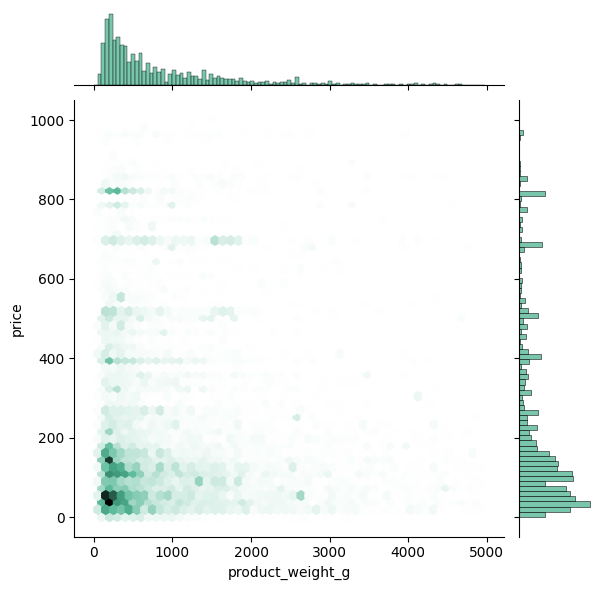

In [51]:
df_filt=df[(df["product_weight_g"]<5000)&(df["price"]<1000)]
sns.jointplot(data=df_filt,x="product_weight_g",y="price", kind="hex", color="#4CB391",)


In [52]:
df["product_volume_cm3"]  = df["product_length_cm"] * df["product_height_cm"] * df["product_width_cm"]


<Axes: xlabel='product_weight_g', ylabel='product_volume_cm3'>

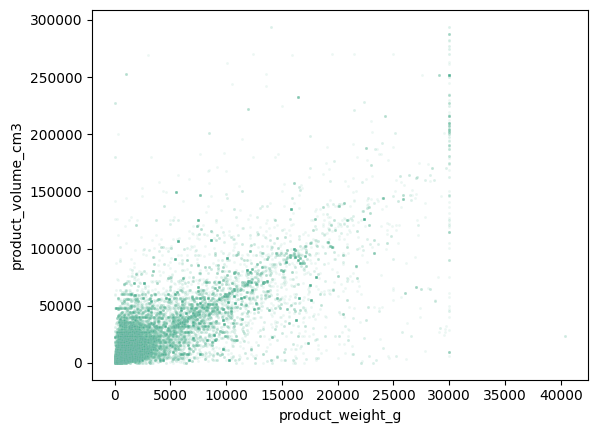

In [53]:
sns.scatterplot(data=df,x="product_weight_g",y="product_volume_cm3", color="#4CB391",alpha=0.1, s=4)

In [54]:
#  the correlation (if one varie the other varies accordingly)  betweeen
# these 2 variable is  strong 
df[["product_weight_g","product_volume_cm3"]].corr()

,product_weight_g,product_volume_cm3
product_weight_g,1.000000,0.800844
product_volume_cm3,0.800844,1.000000


In [55]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date', 'product_id', 'seller_id', 'price',
       'shipping_charges', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_category_name',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'product_volume_cm3'],
      dtype='object')

<Axes: xlabel='product_weight_g', ylabel='shipping_charges'>

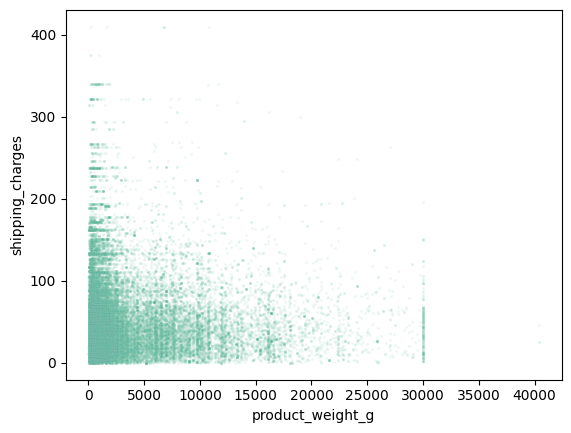

In [56]:
sns.scatterplot(data=df,x="product_weight_g",y="shipping_charges", color="#4CB391",alpha=0.1, s=4)

<Axes: xlabel='price', ylabel='shipping_charges'>

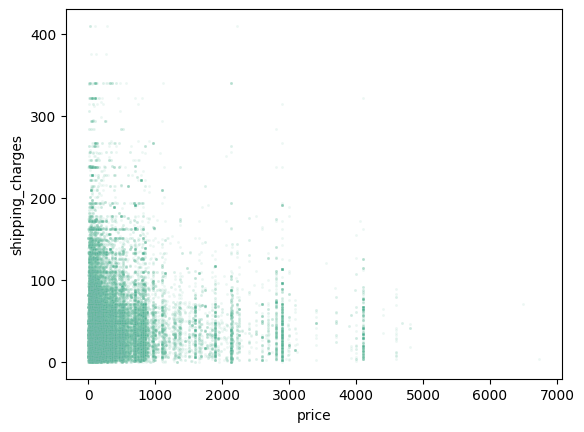

In [57]:
sns.scatterplot(data=df,x="price",y="shipping_charges", color="#4CB391",alpha=0.1, s=4)

In [58]:
grouped = df.groupby("product_category_name")[["product_weight_g", "price", "shipping_charges"]].mean()
grouped

,product_weight_g,price,shipping_charges
product_category_name,,,
agro_industry_and_commerce,5193.194030,329.930299,45.600597
air_conditioning,4402.597403,289.766623,45.754156
art,3257.692308,293.010000,47.497692
arts_and_craftmanship,775.000000,504.360000,102.737500
audio,305.775701,200.571776,50.043738
...,...,...,...
stationery,1942.909091,336.802446,45.519069
tablets_printing_image,305.328125,303.222656,46.287969
telephony,287.263158,542.762708,38.420724


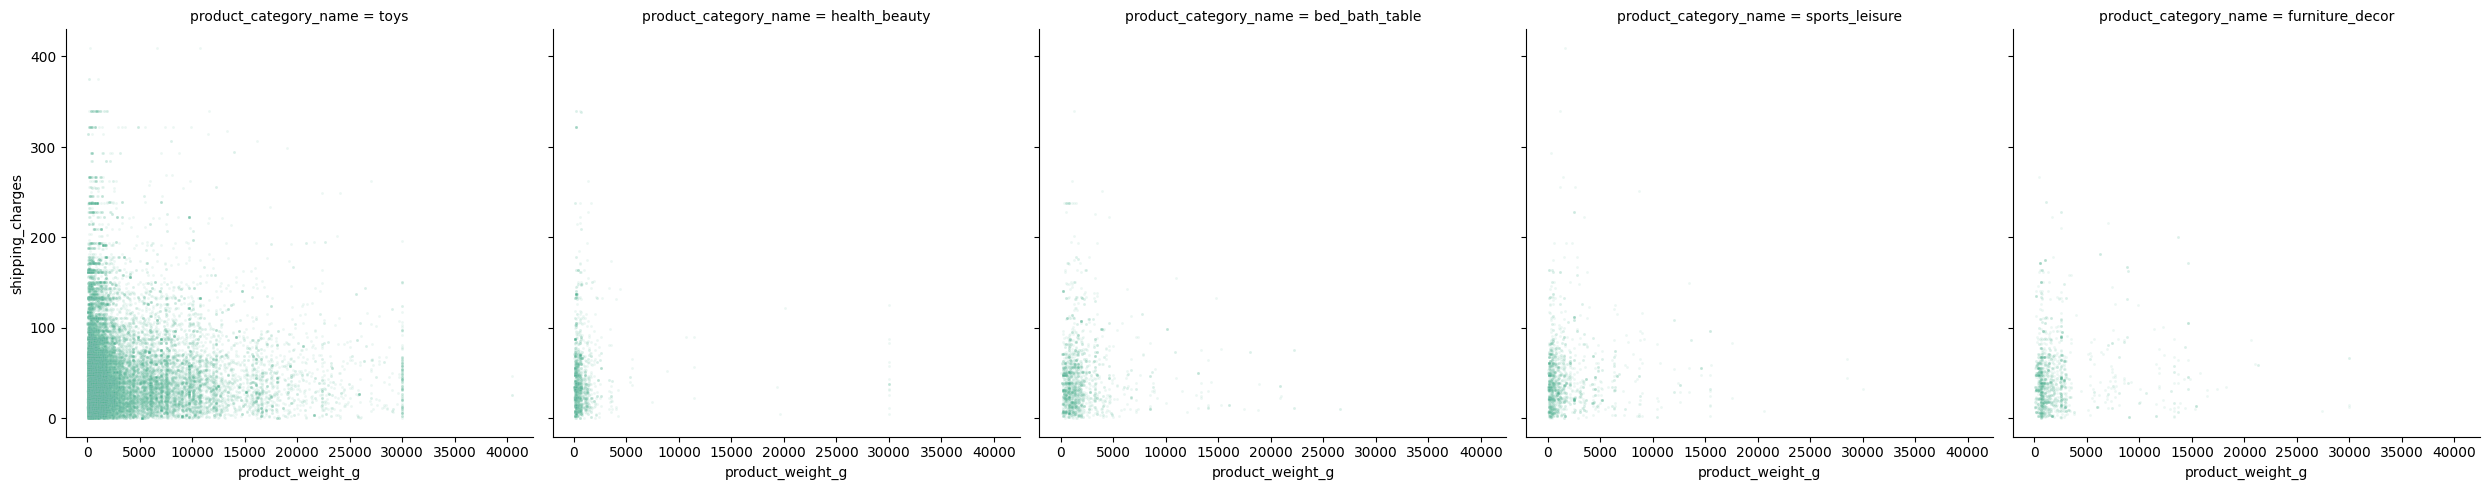

In [59]:
sns.relplot(
    data=df,x="product_weight_g",y="shipping_charges", 
    color="#4CB391",alpha=0.1, s=4, col="product_category_name", col_order=vc.index[:5])

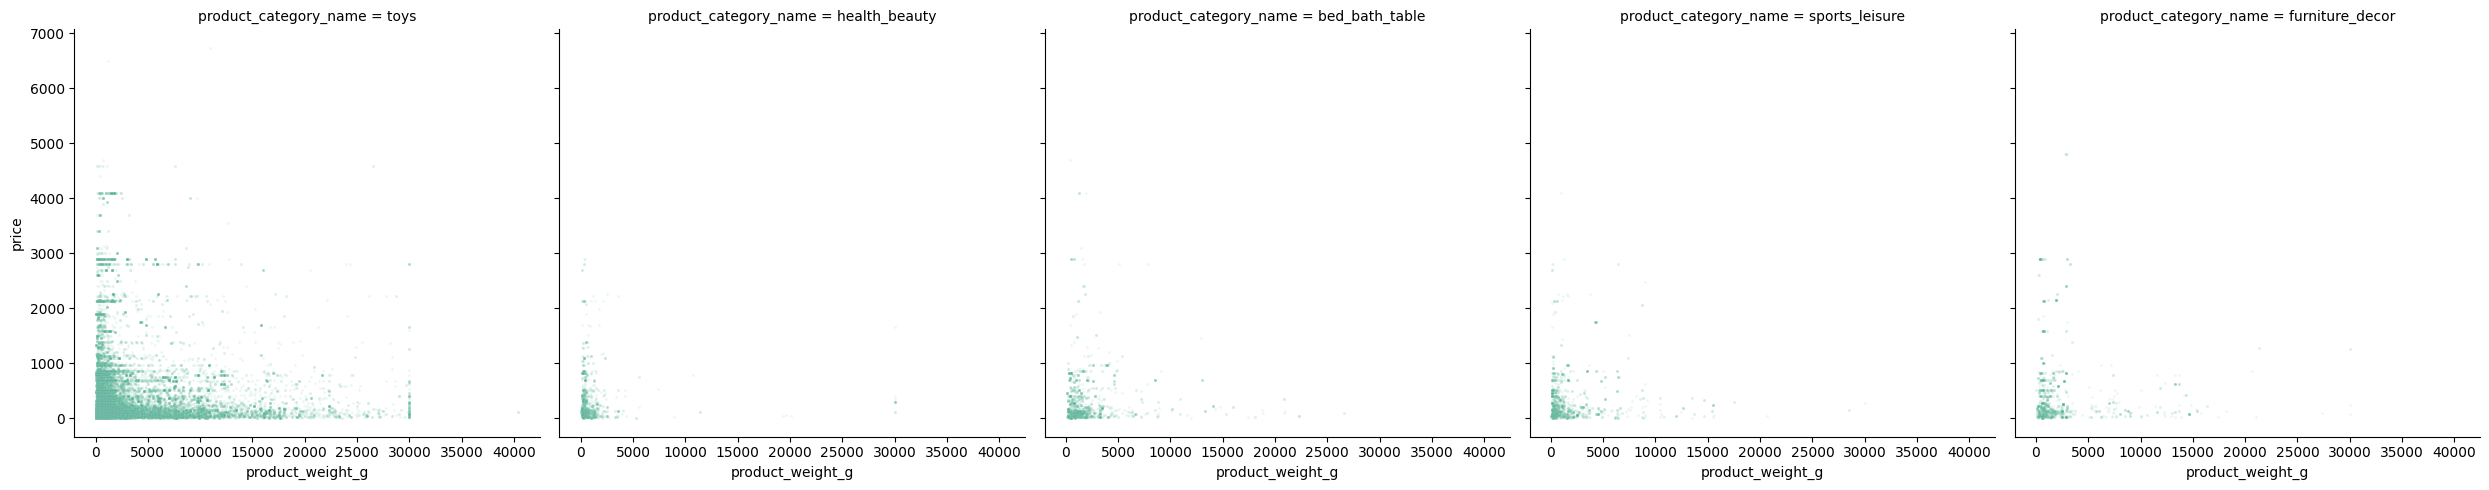

In [60]:
sns.relplot(
    data=df,x="product_weight_g",y="price", 
    color="#4CB391",alpha=0.1, s=4, col="product_category_name", col_order=vc.index[:5])

## H1: Heavier products incur higher shipping costs.


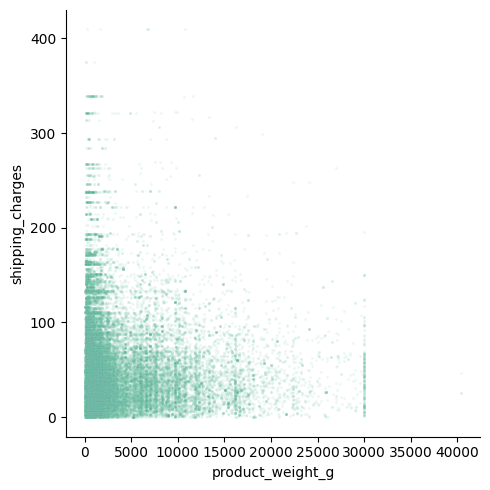

In [61]:

sns.relplot(
    data=df,x="product_weight_g",y="shipping_charges", 
    color="#4CB391",alpha=0.1, s=4, col_order=vc.index[:5])

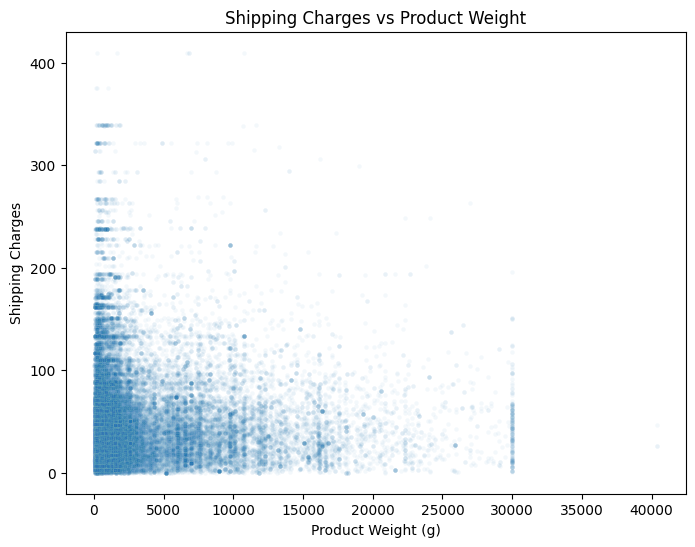

In [62]:

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="product_weight_g",
    y="shipping_charges",
    alpha=0.05,  
    s=10         
)
plt.title("Shipping Charges vs Product Weight")
plt.xlabel("Product Weight (g)")
plt.ylabel("Shipping Charges")
plt.show()


In [64]:
df["weight_bin"] = pd.cut(
    df["product_weight_g"],
    q=5,
    labels=["Very Light", "Light", "Medium", "Heavy", "Very Heavy"]
)

In [119]:
df.groupby("weight_bin")["shipping_charges"].std()

/var/folders/js/q_xy_83s3tv43tdy3vzvblrw0000gn/T/ipykernel_29699/1145956905.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("weight_bin")["shipping_charges"].std()


weight_bin
Very Light    34.263179
Light         36.853996
Medium        40.005715
Heavy         38.939878
Very Heavy    38.526511
Name: shipping_charges, dtype: float64

In [120]:
df.groupby("weight_bin")["shipping_charges"].describe()

/var/folders/js/q_xy_83s3tv43tdy3vzvblrw0000gn/T/ipykernel_29699/739402253.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("weight_bin")["shipping_charges"].describe()


,count,mean,std,min,25%,50%,75%,max
weight_bin,,,,,,,,
Very Light,20769.0,41.213214,34.263179,0.0,20.90,32.34,50.2800,409.68
Light,16795.0,44.150378,36.853996,0.0,20.90,36.51,57.2000,339.59
Medium,16424.0,45.778306,40.005715,0.0,20.90,37.68,60.0700,375.28
Heavy,17526.0,44.778992,38.939878,0.0,17.46,35.10,58.2775,409.68
Very Heavy,17787.0,46.133076,38.526511,0.0,19.86,37.28,61.1600,409.68


In [122]:
df.groupby("volume_bin")["shipping_charges"].describe()

/var/folders/js/q_xy_83s3tv43tdy3vzvblrw0000gn/T/ipykernel_29699/1095718731.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("volume_bin")["shipping_charges"].describe()


,count,mean,std,min,25%,50%,75%,max
volume_bin,,,,,,,,
Very Small,17877.0,41.710966,34.147184,0.0,20.90,33.81,52.130,375.28
Small,17861.0,43.836406,37.320242,0.0,20.32,34.33,56.650,339.59
Medium,17845.0,44.918914,38.967382,0.0,20.02,36.16,58.310,409.68
Large,17859.0,44.328278,37.892107,0.0,18.40,35.75,59.195,339.59
Very Large,17859.0,46.633387,39.641476,0.0,19.86,38.23,60.900,409.68


In [65]:
grouped_weight = df.groupby("weight_bin", observed=True)["shipping_charges"].agg(['mean','std']).reset_index()
grouped_weight


,weight_bin,mean,std
0,Very Light,41.213214,34.263179
1,Light,44.150378,36.853996
2,Medium,45.778306,40.005715
3,Heavy,44.778992,38.939878
4,Very Heavy,46.133076,38.526511


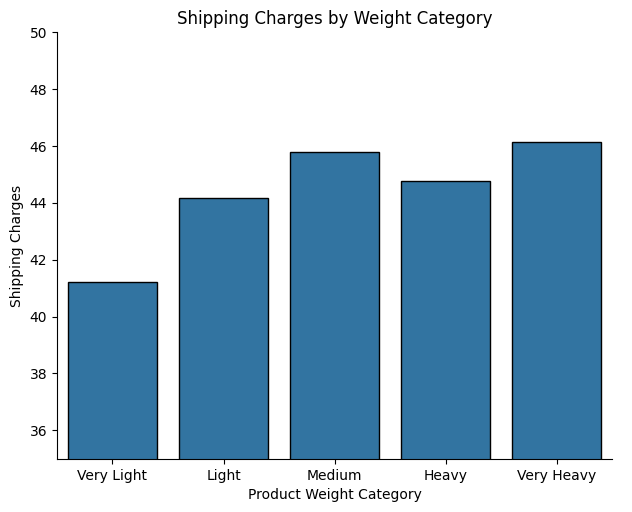

In [146]:
sns.catplot(
    data=df,
    x="weight_bin",
    y="shipping_charges",
    color="tab:blue", 
    edgecolor="black",
    kind= "bar", 
    aspect=1.25,
    errorbar=None

)
sns.despine()
plt.ylim(35,50)

plt.title("Shipping Charges by Weight Category")
plt.xlabel("Product Weight Category")
plt.ylabel("Shipping Charges")
plt.show()


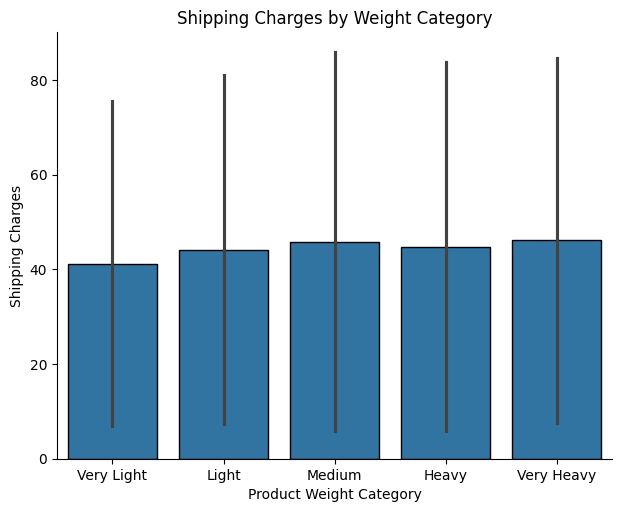

In [131]:
sns.catplot(
    data=df,
    x="weight_bin",
    y="shipping_charges",
    color="tab:blue", 
    edgecolor="black",
    kind= "bar", 
    aspect=1.25,
    errorbar="sd"

)
sns.despine()
#plt.ylim(35,50)

plt.title("Shipping Charges by Weight Category")
plt.xlabel("Product Weight Category")
plt.ylabel("Shipping Charges")
plt.show()


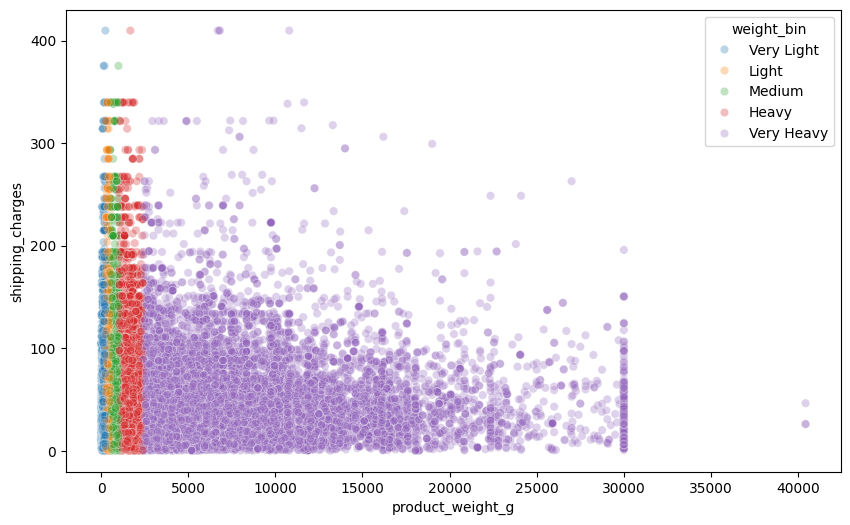

In [117]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='product_weight_g', y='shipping_charges', alpha=0.3, hue="weight_bin")
plt.show()

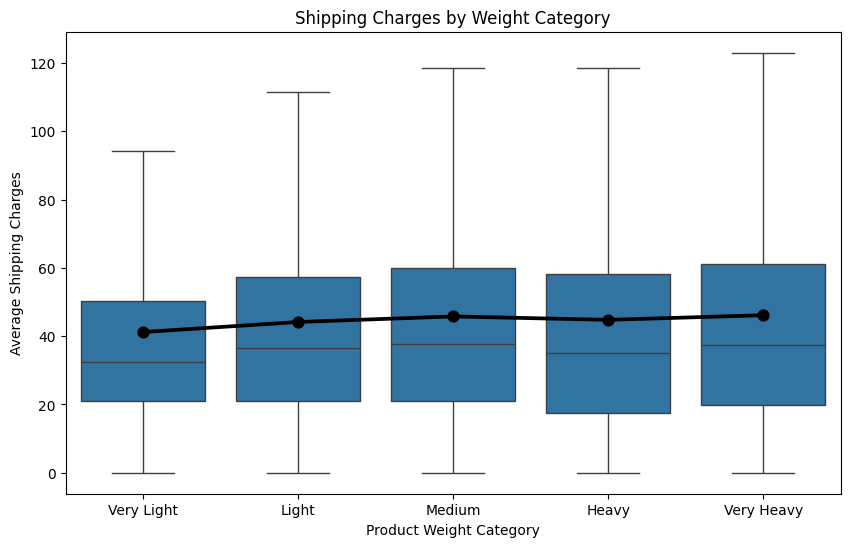

In [67]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="weight_bin", y="shipping_charges", showfliers=False)
sns.pointplot(data=grouped_weight, x="weight_bin", y="mean", color="black")
plt.title("Shipping Charges by Weight Category")
plt.xlabel("Product Weight Category")
plt.ylabel("Average Shipping Charges")
plt.show()


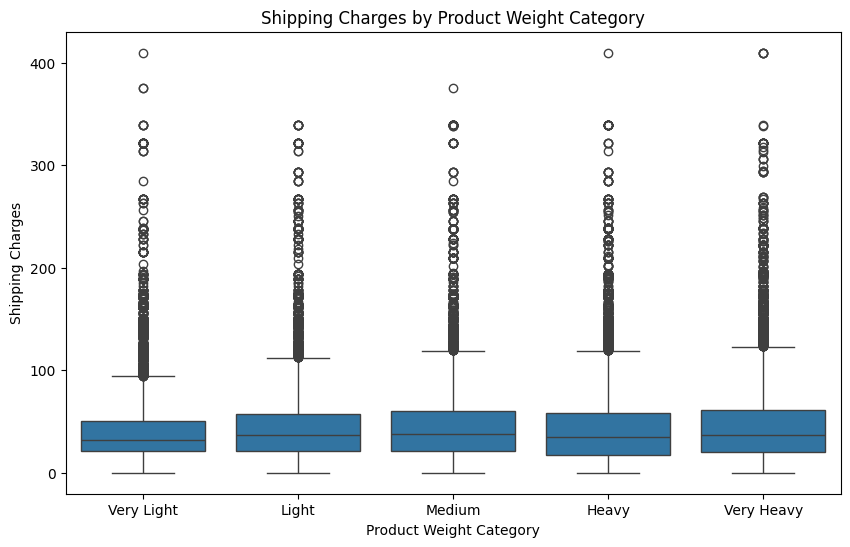

In [66]:

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="weight_bin", y="shipping_charges")
plt.title("Shipping Charges by Product Weight Category")
plt.xlabel("Product Weight Category")
plt.ylabel("Shipping Charges")
plt.show()


/var/folders/js/q_xy_83s3tv43tdy3vzvblrw0000gn/T/ipykernel_29699/2585295572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(
/var/folders/js/q_xy_83s3tv43tdy3vzvblrw0000gn/T/ipykernel_29699/2585295572.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('weight_bin')['shipping_charges'].mean().reset_index()


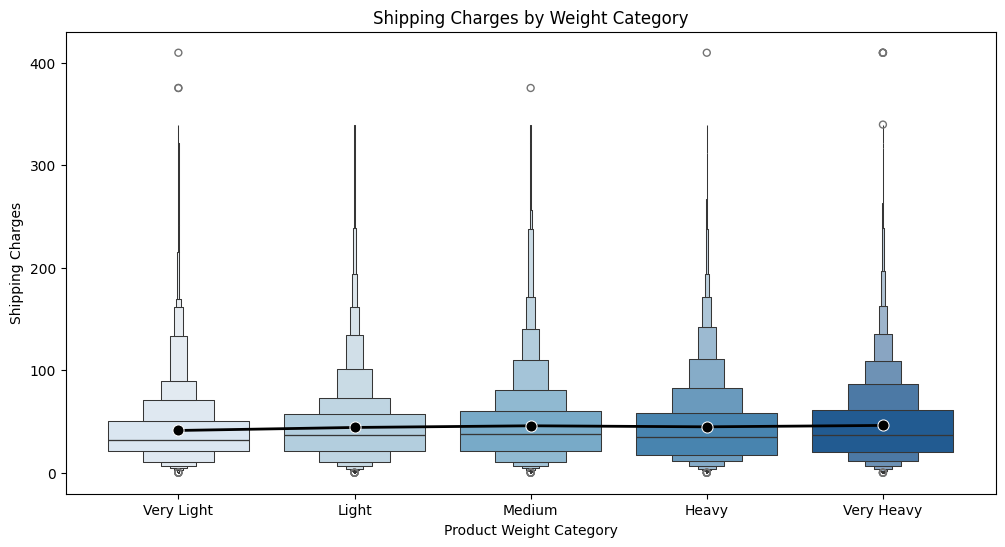

In [69]:
plt.figure(figsize=(12,6))

sns.boxenplot(
    data=df,
    x='weight_bin',
    y='shipping_charges',
    palette='Blues',
)

grouped = df.groupby('weight_bin')['shipping_charges'].mean().reset_index()

sns.lineplot(
    data=grouped,
    x='weight_bin',
    y='shipping_charges',
    color='black',
    marker='o',
    linewidth=2,
    markersize=8,
)

plt.title("Shipping Charges by Weight Category")
plt.xlabel("Product Weight Category")
plt.ylabel("Shipping Charges")
plt.show()


In [70]:
df[['product_weight_g', 'shipping_charges']].corr()


,product_weight_g,shipping_charges
product_weight_g,1.000000,0.023568
shipping_charges,0.023568,1.000000


There is a positive but weak relationship between product weight and shipping costs.
Pearson correlation indicates a low effect size, and the regression line confirms a small upward trend.
Heavier products tend to cost slightly more to ship, but weight alone does not strongly determine shipping price.

## H2: Larger (high-volume) products take longer to deliver.

In [71]:
df['product_volume_cm3'] = (df['product_length_cm'] 
                            * df['product_height_cm'] 
                            * df['product_width_cm'])


In [72]:
df[['product_length_cm', 'product_height_cm', 'product_width_cm', 'product_volume_cm3']].head()


,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,19.0,12.0,16.0,3648.0
1,18.0,14.0,17.0,4284.0
2,16.0,16.0,16.0,4096.0
3,68.0,3.0,48.0,9792.0
4,17.0,4.0,12.0,816.0


In [73]:
df[['order_purchase_timestamp', 'order_delivered_timestamp']].dtypes


order_purchase_timestamp     object
order_delivered_timestamp    object
dtype: object

In [74]:
df['order_delivered_timestamp'] = pd.to_datetime(df['order_delivered_timestamp'], errors='coerce')
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')


In [75]:
df[['order_purchase_timestamp', 'order_delivered_timestamp']].dtypes


order_purchase_timestamp     datetime64[ns]
order_delivered_timestamp    datetime64[ns]
dtype: object

In [76]:
df['delivery_time_days'] = (df['order_delivered_timestamp'] - df['order_purchase_timestamp']).dt.days


In [77]:
df[['order_purchase_timestamp', 'order_delivered_timestamp', 'delivery_time_days']].head()


,order_purchase_timestamp,order_delivered_timestamp,delivery_time_days
0,2017-10-22 18:57:54,2017-10-26 22:19:52,4.0
1,2018-06-20 21:40:31,2018-07-03 22:51:22,13.0
2,2018-02-16 16:19:31,2018-02-27 01:29:50,10.0
3,2018-08-18 18:04:29,2018-08-27 20:03:51,9.0
4,2017-12-22 16:44:04,2018-01-05 19:22:49,14.0


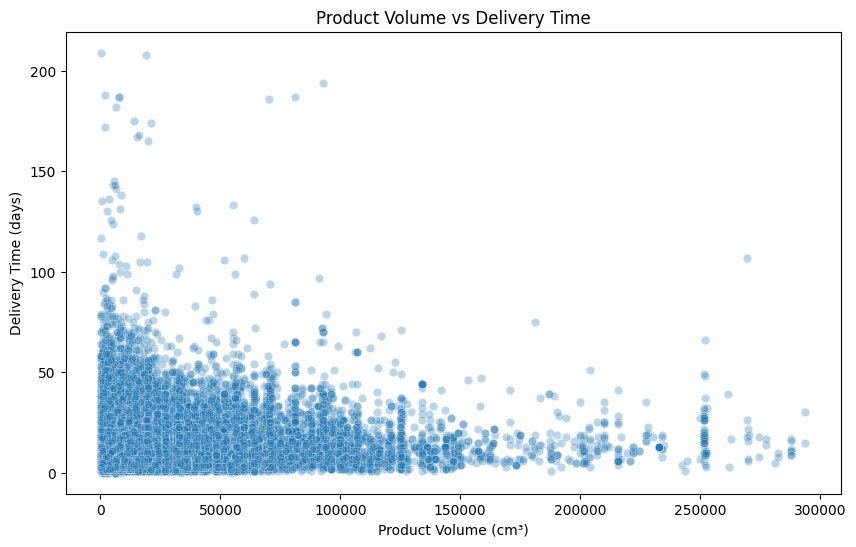

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='product_volume_cm3', y='delivery_time_days', alpha=0.3)
plt.title("Product Volume vs Delivery Time")
plt.xlabel("Product Volume (cm³)")
plt.ylabel("Delivery Time (days)")
plt.show()


In [79]:
df['volume_bin'] = pd.qcut(df['product_volume_cm3'], q=5, labels=['Very Small','Small','Medium','Large','Very Large'])


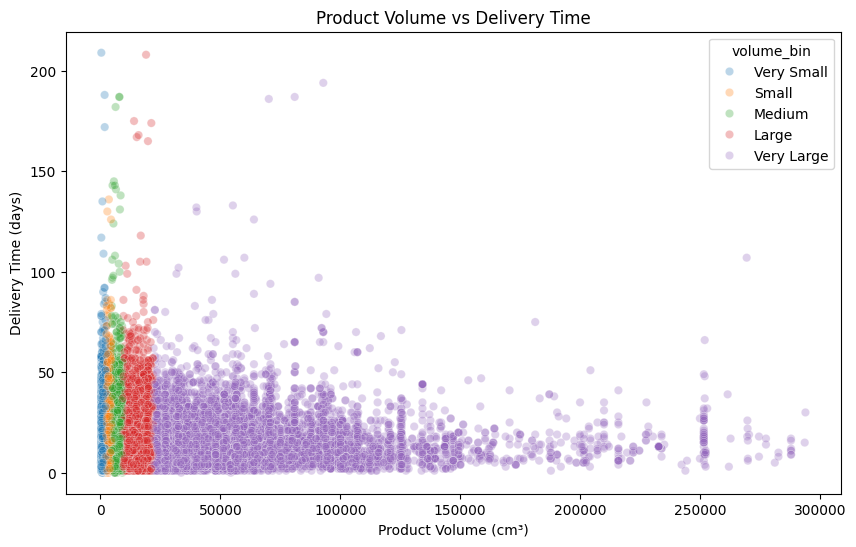

In [115]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='product_volume_cm3', y='delivery_time_days', alpha=0.3, hue="volume_bin")
plt.title("Product Volume vs Delivery Time")
plt.xlabel("Product Volume (cm³)")
plt.ylabel("Delivery Time (days)")
plt.show()

/var/folders/js/q_xy_83s3tv43tdy3vzvblrw0000gn/T/ipykernel_29699/3544489688.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('volume_bin')['delivery_time_days'].mean().reset_index()


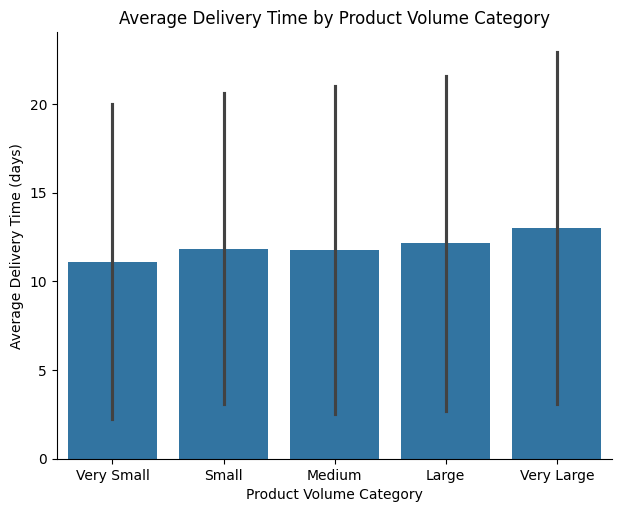

In [147]:
grouped = df.groupby('volume_bin')['delivery_time_days'].mean().reset_index()


sns.catplot(data=df, x='volume_bin', y='delivery_time_days', kind = "bar", aspect=1.25,
    errorbar="sd")
#plt.ylim(8,14)

plt.title("Average Delivery Time by Product Volume Category")
plt.xlabel("Product Volume Category")
plt.ylabel("Average Delivery Time (days)")
plt.show()



/var/folders/js/q_xy_83s3tv43tdy3vzvblrw0000gn/T/ipykernel_29699/2341502696.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('volume_bin')['delivery_time_days'].mean().reset_index()


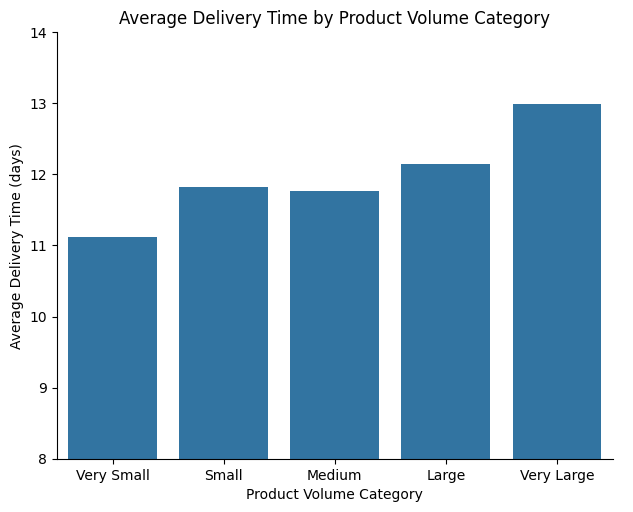

In [149]:
grouped = df.groupby('volume_bin')['delivery_time_days'].mean().reset_index()


sns.catplot(data=df, x='volume_bin', y='delivery_time_days', kind = "bar", aspect=1.25,
    errorbar=None)
plt.ylim(8,14)

plt.title("Average Delivery Time by Product Volume Category")
plt.xlabel("Product Volume Category")
plt.ylabel("Average Delivery Time (days)")
plt.show()



In [ ]:
grouped = df.groupby('volume_bin')['delivery_time_days'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='volume_bin', y='delivery_time_days', alpha=0.3)
plt.title("Average Delivery Time by Product Volume Category")
plt.xlabel("Product Volume Category")
plt.ylabel("Average Delivery Time (days)")
plt.show()

In [ ]:
grouped = df.groupby('volume_bin', observed=True)['delivery_time_days'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(
    data=grouped,
    x='volume_bin',
    y='delivery_time_days',
    marker='o',          
    markersize=8,        
    linewidth=2         
)

plt.title("Average Delivery Time by Product Volume Category")
plt.xlabel("Product Volume Category")
plt.ylabel("Average Delivery Time (days)")
plt.show()


In [ ]:
grouped = df.groupby('volume_bin', observed=True)['delivery_time_days'].agg(['mean','std']).reset_index()


In [ ]:
plt.figure(figsize=(12,6))


sns.stripplot(
    data=df,
    x='volume_bin',
    y='delivery_time_days',
    alpha=0.1,
    jitter=True,
    color='steelblue'
)



plt.errorbar(
    x=grouped['volume_bin'],
    y=grouped['mean'],
    yerr=grouped['std'],
    fmt='none',
    ecolor='black',
    capsize=5,
    zorder=6
)

plt.title("Delivery Time vs Product Volume Category\n(Scatter + Mean + SD)")
plt.xlabel("Product Volume Category")
plt.ylabel("Delivery Time (days)")
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(
    data=df, 
    x="volume_bin", 
    y="delivery_time_days",
    inner=None, 
    color="lightblue"
)

plt.title("Delivery Time Distribution + Mean Trend")
plt.xlabel("Product Volume Category")
plt.ylabel("Delivery Time (days)")
plt.show()


In [ ]:
corr_volume_delivery = df['product_volume_cm3'].corr(df['delivery_time_days'])
corr_volume_delivery


In [ ]:
grouped_median = df.groupby('volume_bin', observed=True)['delivery_time_days'].median().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(
    data=grouped_median,
    x='volume_bin',
    y='delivery_time_days',
    marker='o',
    linewidth=2
)

plt.title("Median Delivery Time by Product Volume Category")
plt.xlabel("Product Volume Category")
plt.ylabel("Median Delivery Time (days)")
plt.show()


In [ ]:
order_level = df.groupby('order_id').agg({
    'product_volume_cm3': 'mean',
    'delivery_time_days': 'mean'
}).reset_index()

order_level.head()


In [ ]:
order_level['product_volume_cm3'].corr(order_level['delivery_time_days'])


In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=order_level,
    x='product_volume_cm3',
    y='delivery_time_days',
    alpha=0.3
)
plt.title("Order Volume vs Delivery Time")
plt.xlabel("Average Order Volume (cm³)")
plt.ylabel("Average Delivery Time (days)")
plt.show()


In [ ]:
order_level['volume_bin'] = pd.qcut(
    order_level['product_volume_cm3'],
    q=5,
    labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large']
)


In [ ]:
sns.boxplot(data=order_level, x='volume_bin', y='delivery_time_days')
plt.title("Delivery Time by Order Volume Category")
plt.show()


In [ ]:
grouped = df.groupby('volume_bin', observed=True)['delivery_time_days'] \
            .agg(['mean', 'std']).reset_index()


In [ ]:
plt.figure(figsize=(12,6))

sns.lineplot(
    data=grouped,
    x='volume_bin',
    y='mean',
    marker='o',
    markersize=8,
    linewidth=2,
    color='steelblue'
)

plt.title("Average Delivery Time by Product Volume")
plt.xlabel("Product Volume Category")
plt.ylabel("Average Delivery Time (days)")

plt.show()
